Jeremy Kawahigashi 10/17/24 Lab 1



Introduction


The purpose of this lab is the understand multiple linear regression and Regularization.

Multiple linear regression uses multiple independent variables to predict the value of the dependent variable as opposed to linear regression where just one variable is used.

The goal of multiple linear regression is to find the best-fit line = r-squared. This is the sum of the squared differences between the observed and predicted values. This result tells you which is the best-fit line, the closer to 1, the better.

Regularization is used to prevent overfitting the model. This is sometimes needed to remove the additional noise which is bad when introducing new data.

Two techniques are used, ridge which is based on the sum of the squared coefficients or lasso which is based on the absloute value of the sum of all the squared coefficients.

Both multiple linear regression is essential to understand if a person wants to predict the outcome of something based on multiple independent variables. In addition, regularization may be needed after to get a more accurate model. Regularization is the next step after Multiple linear regression which builds upon past learnings of linear regression.

Part 1: (Step 7 bullet point)
* The R-squared value for 'TV' is 61.2%.
* The R-squared value for 'Radio' is 33.2%.
* Together, should they explain 99.4% of the variation in 'Sales'?

No because the R-squared values account for the sales of one product out of all the products. Since both are taken seperatly they have overlap when findind the R-squared thus you can't just add it together. 

Part 1.2: (Step 10 bullet point)
* We get an R-squared value of 89.7%.
* This is less than 94.4%. Why?

R-squared values account for the sales of one product out of all the products. Since both are taken seperatly they have overlap when findind the R-squared thus you can't just add it together. 

This is becuase now there is no overlap. Before we had overlap and were essientally counting the same thing twice. By doing multiple linear regression we remove the overlap between the two products


Part 2


In [926]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [927]:

df = pd.read_csv("allgreens.csv")

Part 2.2

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     126.9
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.75e-11
Time:                        21:26:44   Log-Likelihood:                -155.40
No. Observations:                  27   AIC:                             314.8
Df Residuals:                      25   BIC:                             317.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.1496     36.770     -2.452      0.0

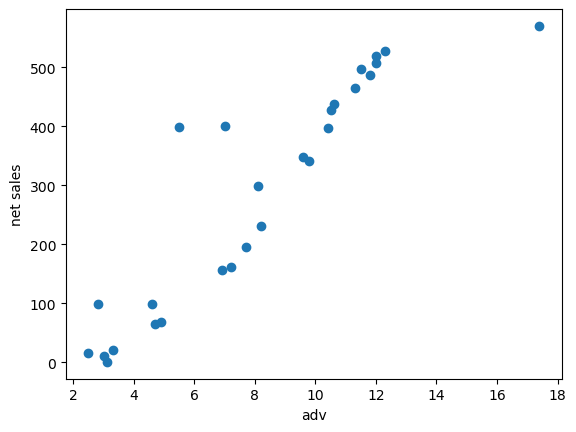

In [928]:
y = df.X1
X = df.X4
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)
plt.figure()
plt.scatter(df.X4, df.X1)
plt.xlabel("adv")
plt.ylabel("net sales")

correlation = np.corrcoef(df['X4'], df['X1'])
correlation_coefficient = correlation[0, 1]  
print("Correlation coefficient:", correlation_coefficient)


Correlation of annual net sales and money spent on advertising

Correlation coefficient: 0.9140240746000745

Part 2.3

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           3.52e-11
Time:                        21:26:44   Log-Likelihood:                -155.67
No. Observations:                  27   AIC:                             315.3
Df Residuals:                      25   BIC:                             317.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        563.5926     29.283     19.246      0.0

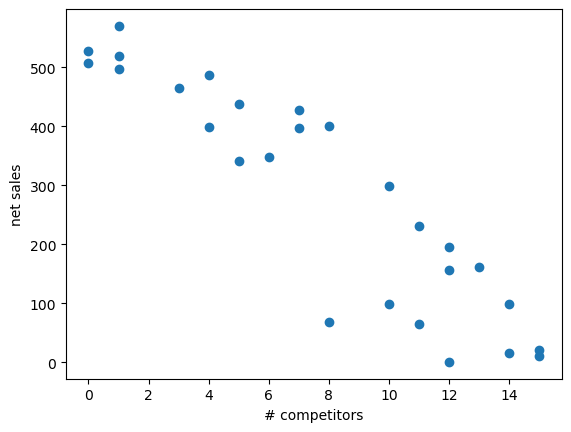

In [929]:
y = df.X1
X = df.X6
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)
plt.figure()
plt.scatter(df.X6, df.X1)
plt.xlabel("# competitors")
plt.ylabel("net sales")

correlation = np.corrcoef(df['X6'], df['X1'])
correlation_coefficient = correlation[0, 1]  
print("Correlation coefficient:", correlation_coefficient)

Correlation of # of competitors in the areal and net sales 

Correlation coefficient: -0.9122363921094575


Looking at the R-squared, it appears that regularization was not needed. Because a 0.998 indicating a good fit. Looking at the regression equations 

Part 2.4:

                                 OLS Regression Results                                
Dep. Variable:                     X1   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2093.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                    1.11e-28
Time:                        21:26:44   Log-Likelihood:                         -112.68
No. Observations:                  27   AIC:                                      235.4
Df Residuals:                      22   BIC:                                      241.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

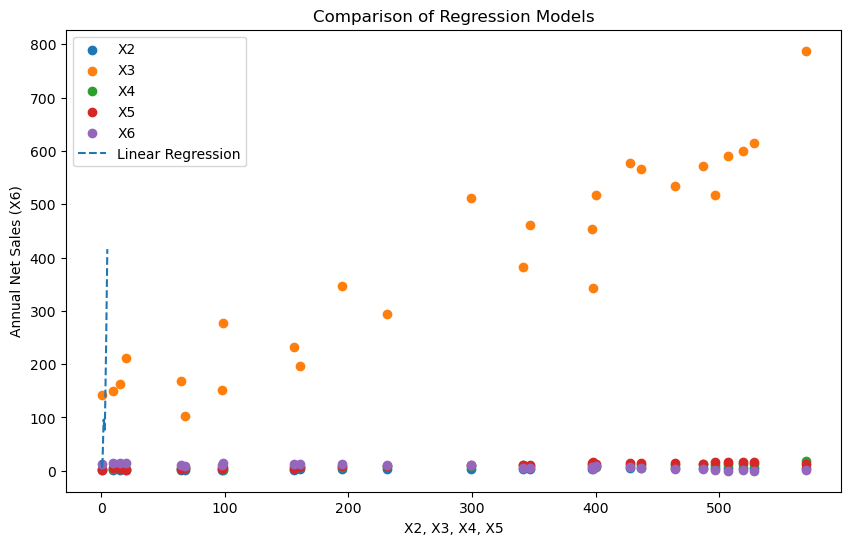

In [930]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X = df[['X2', 'X3', 'X4', 'X5', 'X6']]
y = df['X1']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_linear = linear_regression_model.predict(X_test)
y_pred_linear = linear_regression_model.predict(X_test)


lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

plt.figure(figsize=(10, 6))
plt.scatter(df.X1, df.X2,label='X2')
plt.scatter(df.X1, df.X3,label='X3')
plt.scatter(df.X1, df.X4,label='X4')
plt.scatter(df.X1, df.X5,label='X5')
plt.scatter(df.X1, df.X6, label='X6')
plt.plot(y_pred_linear, label='Linear Regression', linestyle='--')
plt.xlabel('X2, X3, X4, X5')
plt.ylabel('Annual Net Sales (X6)')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()



Part 2.5

Looking at the results, it seems as if only X3 increases whereas X4, X5, and X6 do not pass 100 which results in a type of skewed linear regression model. This means the linear regression model line will not help very much unless all of X3 is considered outliers. 

Part 2.6

Linear Regression Equation: y = 10.98 + -0.06 * x1 + 0.87 * x2 + 0.01 * x3 + 0.34 * x4 + 0.38 * x5
Lasso Regression Equation: y = 13.68 + -0.03 * x1 + 0.00 * x2 + 0.01 * x3 + -0.00 * x4 + 0.00 * x5
Ridge Regression Equation: y = 11.33 + -0.05 * x1 + 0.78 * x2 + 0.01 * x3 + 0.27 * x4 + 0.33 * x5
Linear Regression R-squared: 0.48803419524466973
Lasso Regression R-squared: 0.46130444342883714
Ridge Regression R-squared: 0.49953026129950884


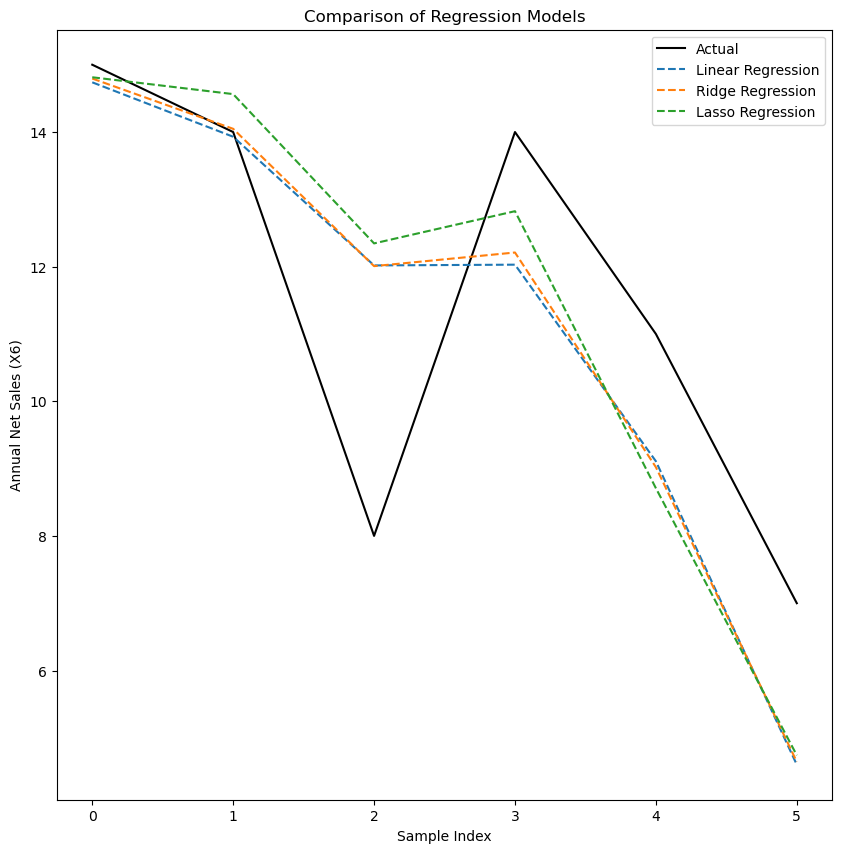

In [931]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = pd.read_csv('allgreens.csv')

X = data[['X1', 'X2', 'X3', 'X4', 'X5']]
y = data['X6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_linear = linear_regression_model.predict(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

lin_coefficients = linear_regression_model.coef_
lin_intercept = linear_regression_model.intercept_

equation_linear = f"y = {lin_intercept:.2f}"
for i, coef in enumerate(lin_coefficients):
    equation_linear += f" + {coef:.2f} * x{i+1}"

print("Linear Regression Equation:", equation_linear)

las_coefficients = lasso_model.coef_
las_intercept = lasso_model.intercept_

equation_lasso = f"y = {las_intercept:.2f}"
for i, coef in enumerate(las_coefficients):
    equation_lasso += f" + {coef:.2f} * x{i+1}"

print("Lasso Regression Equation:", equation_lasso)

rid_coefficients = ridge_model.coef_
rid_intercept = ridge_model.intercept_

equation_ridge = f"y = {rid_intercept:.2f}"
for i, coef in enumerate(rid_coefficients):
    equation_ridge += f" + {coef:.2f} * x{i+1}"

print("Ridge Regression Equation:", equation_ridge)


r2_linear = r2_score(y_test, y_pred_linear)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)


print("Linear Regression R-squared:", r2_linear)
print("Lasso Regression R-squared:", r2_lasso)
print("Ridge Regression R-squared:", r2_ridge)

plt.figure(figsize=(10, 10))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_linear, label='Linear Regression', linestyle='--')
plt.plot(y_pred_ridge, label='Ridge Regression', linestyle='--')
plt.plot(y_pred_lasso, label='Lasso Regression', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Annual Net Sales (X6)')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()


Part 2.4.4

The only way I could actually see the lines was to remove the scatter plot to get this result. I beleve that the black line represent the averages of all X2-X6 which makes sense since X3 was very high and the rest very low. 

However looking at the R-squared values when comparing linear vs lasso vs ridge, the ridge did improve at 0.499 vs 0.488 for the linear. This means that although I beleive the black line is the averages, it is still not the best fit line to predict the next variable. 

Part 2.1 (actually 3.9)
*Looking at the califonia housing train find the response variable.

The response varible or the varible we want to watch is the median house vaule. This the median house vaule is depended on all the other varibles. It is the varible we want to predict the response too

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:26:45   Log-Likelihood:            -2.1683e+05
No. Observations:               17000   AIC:                         4.337e+05
Df Residuals:                   16998   BIC:                         4.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.398e+04   1456.540     30.195

Text(0, 0.5, 'house value')

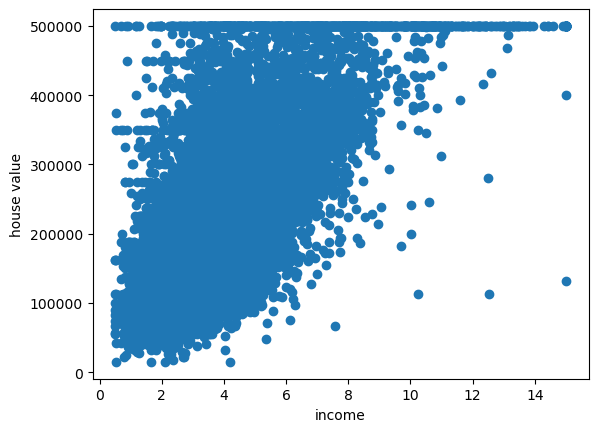

In [933]:

df = pd.read_csv("california_housing_train.csv")
y = df.median_house_value
X = df.median_income
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)
plt.figure()
plt.scatter(df.median_income, df.median_house_value)
plt.xlabel("income")
plt.ylabel("house value")


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.80e-44
Time:                        21:26:45   Log-Likelihood:            -2.2226e+05
No. Observations:               17000   AIC:                         4.445e+05
Df Residuals:                   16998   BIC:                         4.445e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.792e+05   2195

Text(0, 0.5, 'house value')

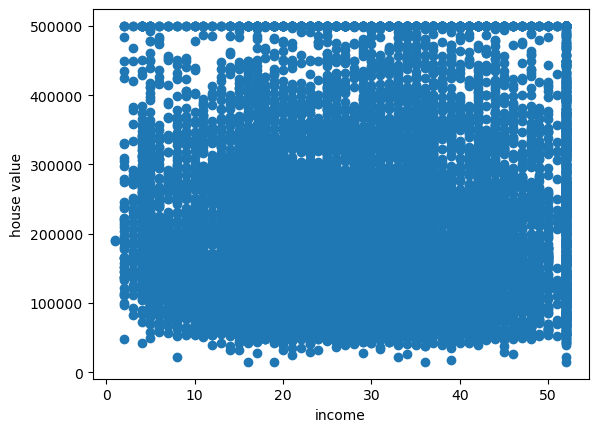

In [934]:
y = df.median_house_value
X = df.housing_median_age
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)
plt.figure()
plt.scatter(df.housing_median_age, df.median_house_value)
plt.xlabel("income")
plt.ylabel("house value")

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     296.8
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.08e-66
Time:                        21:26:45   Log-Likelihood:            -2.2221e+05
No. Observations:               17000   AIC:                         4.444e+05
Df Residuals:                   16998   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.889e+05   1386.257    136.249      

Text(0, 0.5, 'house value')

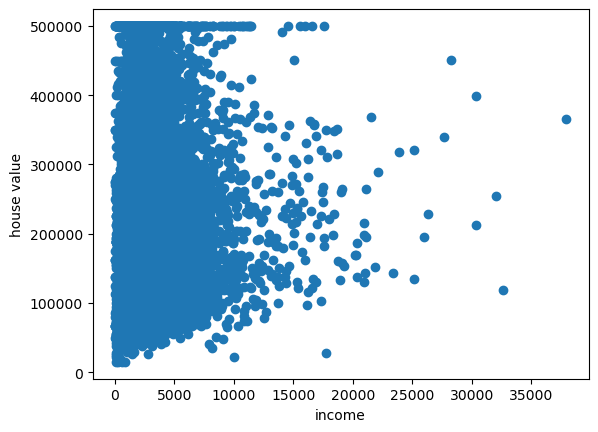

In [935]:
y = df.median_house_value
X = df.total_rooms
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)
plt.figure()
plt.scatter(df.total_rooms, df.median_house_value)
plt.xlabel("income")
plt.ylabel("house value")

Part 3.11

California Best predictors

The three best predictors I choose were median_income, total_rooms, and house_median_age. All were chosen based off both semantic and data-driven. My initial guesses were median_income and either rooms/bedrooms. Which proved correct when testing the data. My other guess was longitude and latitude over house_median_age but since longitude and latitude were split, I decided to stick with only one indepent variable.

Part 3


Conclusion

Overall this lab in addition to todays class everything started to come together. 

The problems that I faced the most were multiple linear regression models. However the problem was implementing the code as opposed to not understanding the problem. This occured when working with the allgreens.csv. It was hard to find implement both multiple linear regression model and it was even harder trying to implement it along side regularization. However the problems occured in the code, and not my understanding of the problem. 

In addition some term made dia_lasso+ridge hard to complete. The words specifically unregularized ridge-regularized regression confused me because regularized is ridge regression thus making something unregularized and then with ridge-regularization confused me. However after finding the liear regression and the ridge regression the problem seemed simpler.

Overall much of this lab worked after most topic and idea clicked in class today. Although coding it is easier, it is essiental to understand what is going on before transfering it into code for ease. In additon, it is also important to understand the libraries used numpy, sklearn, matplotlib, etc. 